## Identifying Trends in Gun Violence Incidents in the USA from 2014 to 2018

By Miles Simpson

### Background

Outline:  
America's history with gun violence/guns in general  
Actions to reduce/mitigate gun violence  
This dataset in particular  

Ethical Concerns:  
Emphasizing certain dates as risk periods could create   
Demographic analysis creates risks of stereotyping groups of people/locations  




Gun violence is a hot button issue in modern day America, especially in the wake of such highly publicised mass shootings such as the Pulse shooting in 2016. This has resulted in difficulty maintaining objectivity when approaching the implementation of measures to reduce incidents, either by restricting the types of guns or by creating more robust methods of tracking.  

I plan to explore this topic using a dataset from Kaggle to identify trends in number of gun violence incidences by time, location, and demographics. 



In [1]:
# Start writing code here...
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import scipy
import geopandas as gpd
import datetime
import calendar
import shapely
import plotly.graph_objects as go
import seaborn as sns
import string
#import warnings
#warnings.filterwarnings('ignore')

df=pd.read_csv("/work/CISC367_Final_Project/data/gun-violence-data_01-2013_03-2018.csv")

In [2]:

df.info

<bound method DataFrame.info of         incident_id        date           state city_or_county  \
0            461105  2013-01-01    Pennsylvania     Mckeesport   
1            460726  2013-01-01      California      Hawthorne   
2            478855  2013-01-01            Ohio         Lorain   
3            478925  2013-01-05        Colorado         Aurora   
4            478959  2013-01-07  North Carolina     Greensboro   
...             ...         ...             ...            ...   
239672      1083142  2018-03-31       Louisiana          Rayne   
239673      1083139  2018-03-31       Louisiana   Natchitoches   
239674      1083151  2018-03-31       Louisiana         Gretna   
239675      1082514  2018-03-31           Texas        Houston   
239676      1081940  2018-03-31           Maine   Norridgewock   

                                          address  n_killed  n_injured  \
0       1506 Versailles Avenue and Coursin Street         0          4   
1                    13500 

<AxesSubplot:xlabel='date'>

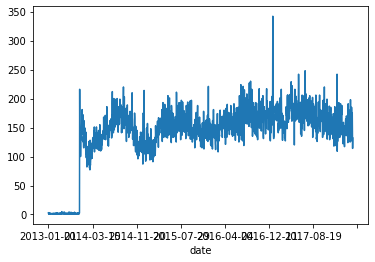

In [3]:
df.groupby('date')['incident_id'].count().plot()

Variance within years? spikes on certain days?

In [4]:

def findDay(date):
    day_name = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
    return (calendar.day_name[day_name])
  
# from here: https://www.geeksforgeeks.org/python-program-to-find-day-of-the-week-for-a-given-date/
dotw_df=df['date'].apply(findDay)
#that makes it just the column
dotw_df=df
dotw_df['date']=df['date'].apply(findDay)
#This actually modifies the original df but I'll just reread it from the csv later



<AxesSubplot:xlabel='date'>

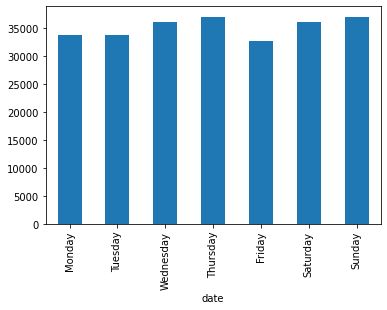

In [5]:
df.groupby('date')['incident_id'].count().plot.bar()
#works but out of order
#solution from here: https://stackoverflow.com/questions/47741400/pandas-dataframe-group-and-sort-by-weekday



from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['date'] = df['date'].astype(cat_type)
df.groupby('date')['incident_id'].count().plot.bar()

In [6]:
# average number instead of total? reset df
df=pd.read_csv("/work/CISC367_Final_Project/data/gun-violence-data_01-2013_03-2018.csv")
temp=df.groupby('date')['incident_id'].count().reset_index()
temp
#somewhat works, skipping to after next one to do better one-shot cleaning

,date,incident_id
0,2013-01-01,3
1,2013-01-05,1
2,2013-01-07,2
3,2013-01-19,1
4,2013-01-21,2
...,...,...
1720,2018-03-27,135
1721,2018-03-28,175
1722,2018-03-29,131
1723,2018-03-30,114


Not much trend in total incidents by day of the week, try average?

In [7]:
# new instance of df
df=pd.read_csv("/work/CISC367_Final_Project/data/gun-violence-data_01-2013_03-2018.csv")
def strpyear(string):
    string=string[0:4]
    return string
def rmyear(string):
    return string[5:]

<AxesSubplot:xlabel='year'>

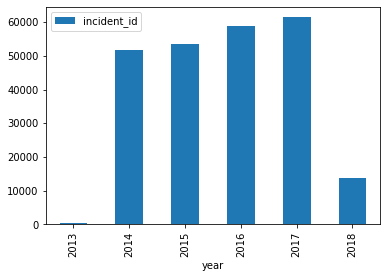

In [8]:
df['year']=df['date'].apply(strpyear)
df['date']=df['date'].apply(rmyear)

df.groupby('year').count().plot.bar(y='incident_id')



Most likely want to exclude 2013 and 2018 from final data due to incompleteness  
Check for nonzero slope of linear plot of incidents over years?

In [9]:
#Permanent spot for cleaning data to not have to constantly reread the data, master copy
mdf=pd.read_csv("/work/CISC367_Final_Project/data/gun-violence-data_01-2013_03-2018.csv")


def mfindDay(date):
    day_name = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
    return (calendar.day_name[day_name])
from pandas.api.types import CategoricalDtype
mdf['dotw']=mdf['date'].apply(mfindDay)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
mdf['dotw'] = mdf['dotw'].astype(cat_type)

def mstrpyear(string):
    string=string[0:4]
    return string
def mrmyear(string):
    return string[5:]

mdf['year']=mdf['date'].apply(mstrpyear)
mdf['m/d']=mdf['date'].apply(mrmyear)
#removing 2013 and 2018 due to incompleteness of data
mdf=mdf[mdf.year!='2013']
mdf=mdf[mdf.year!='2018']

#Adding state codes for plotly

def abbrev(state):
    us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
    
}
    return us_state_abbrev[state]

mdf['state_code']=mdf['state'].apply(abbrev)


mdf

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,dotw,year,m/d,state_code
278,95289,2014-01-01,Michigan,Muskegon,300 block of Monroe Avenue,0,0,http://www.gunviolencearchive.org/incident/95289,http://www.mlive.com/news/muskegon/index.ssf/2...,False,...,NaN,0::Unharmed,0::Victim,http://www.mlive.com/news/muskegon/index.ssf/2...,92.0,34.0,Wednesday,2014,01-01,MI
279,92401,2014-01-01,New Jersey,Newark,Central Avenue,0,0,http://www.gunviolencearchive.org/incident/92401,http://www.nj.com/essex/index.ssf/2014/01/newa...,False,...,NaN,NaN,NaN,http://www.nj.com/essex/index.ssf/2014/01/newa...,29.0,29.0,Wednesday,2014,01-01,NJ
280,92383,2014-01-01,New York,Queens,113th Avenue,1,0,http://www.gunviolencearchive.org/incident/92383,http://www.timesledger.com/stories/2014/2/firs...,False,...,NaN,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.timesledger.com/stories/2014/2/firs...,33.0,14.0,Wednesday,2014,01-01,NY
281,92142,2014-01-01,New York,Brooklyn,St. Johns Place,0,1,http://www.gunviolencearchive.org/incident/92142,http://www.nydailynews.com/new-york/nyc-crime/...,False,...,NaN,0::Injured,0::Victim||1::Subject-Suspect,http://www.nydailynews.com/new-york/nyc-crime/...,43.0,20.0,Wednesday,2014,01-01,NY
282,95261,2014-01-01,Missouri,Springfield,Beverly Hills and Temple,0,1,http://www.gunviolencearchive.org/incident/95261,http://www.ozarksfirst.com/story/deputies-6-ye...,False,...,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.ozarksfirst.com/story/deputies-6-ye...,131.0,30.0,Wednesday,2014,01-01,MO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225870,1018014,2017-12-31,South Carolina,Florence,200 Block of E Liberty St,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.wmbfnews.com/story/37168117/florenc...,False,...,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.wmbfnews.com/story/37168117/florenc...,59.0,30.0,Sunday,2017,12-31,SC
225871,1019711,2017-12-31,Florida,Cape Coral,5703 Cape Harbour Dr,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.nbc-2.com/story/37178796/shots-fire...,False,...,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.nbc-2.com/story/37178796/shots-fire...,77.0,27.0,Sunday,2017,12-31,FL
225872,1020965,2017-12-31,Florida,Saint Petersburg,170 Beach Dr NE,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.baynews9.com/content/news/baynews9/...,False,...,NaN,0::Injured,0::Victim,http://www.baynews9.com/content/news/baynews9/...,68.0,19.0,Sunday,2017,12-31,FL
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,http://www.gunviolencearchive.org/incident/101...,https://chicago.suntimes.com/news/man-wounded-...,False,...,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,https://chicago.suntimes.com/news/man-wounded-...,NaN,NaN,Sunday,2017,12-31,IL


<AxesSubplot:xlabel='dotw'>

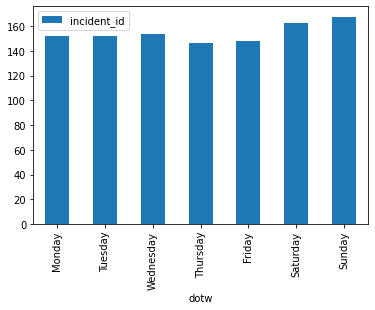

In [10]:
#aggregating data to find average incidence rates
df=mdf
agg=df.groupby('date')['incident_id'].count().reset_index()
agg['dotw']=agg['date'].apply(mfindDay)

cat_type = CategoricalDtype(categories=cats, ordered=True)
agg['dotw'] = agg['dotw'].astype(cat_type)
agg.groupby('dotw').mean().plot.bar()


Slight spike on weekends, I suspect that many of the incident rate trends have to do with when people are off of a standard work week  
Statistically significant difference between weekend and weekdays?

<AxesSubplot:xlabel='date'>

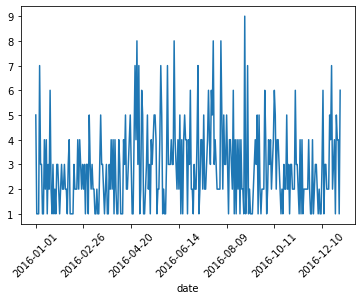

In [11]:
#will baltimore stats show the riots in may 2016?
df=mdf
df=df[df.city_or_county == 'Baltimore']
df=df[df.year=='2016']
df.groupby('date')['incident_id'].count().plot(rot=45)




Maybe? not obvious enough to really look into though  
Moving on to broader charting of incidents over states

In [12]:
df=mdf
agg=df.groupby('state_code')['incident_id'].count().reset_index()
#state pop data from here: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html
census=pd.read_csv("/work/CISC367_Final_Project/data/nst-est2019-01.csv",thousands=',')

#Using average estimated population over 2014 through 2017
census=census.iloc[:,[0,7,8,9,10]]
cen=census.iloc[:,1:4]
census['mean']=cen.mean(axis=1)
census=census.iloc[:,[0,5]]
census['Geographic Area']=census['Geographic Area'].apply(abbrev)

In [13]:
agg

,state_code,incident_id
0,AK,1288
1,AL,5122
2,AR,2650
3,AZ,2177
4,CA,15171
5,CO,2965
6,CT,2903
7,DC,3015
8,DE,1576
9,FL,14197


<AxesSubplot:ylabel='state_code'>

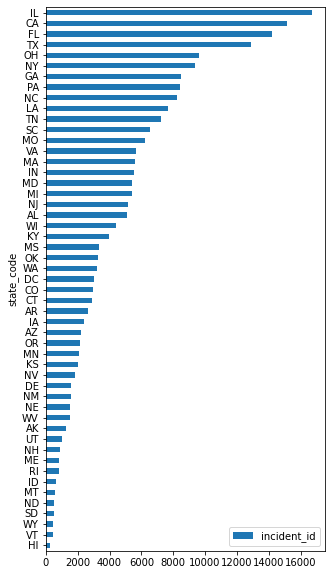

In [14]:
agg.sort_values('incident_id').plot.barh(x='state_code',y='incident_id',figsize=(5,10))
#need to format this pretty heavily

Illinois? check city rankings to see if it's Chicago's influence

In [15]:
agg=agg.set_index('state_code').join(census.set_index('Geographic Area')).reset_index()

def incident_rate(row):
    return 100000*row['incident_id']/row['mean']

agg

,state_code,incident_id,mean
0,AK,1288,7.384123e+05
1,AL,5122,4.852557e+06
2,AR,2650,2.978453e+06
3,AZ,2177,6.833720e+06
4,CA,15171,3.889404e+07
5,CO,2965,5.446646e+06
6,CT,2903,3.586596e+06
7,DC,3015,6.745143e+05
8,DE,1576,9.408867e+05
9,FL,14197,2.022281e+07


In [16]:
agg['incident_rate']=agg.apply(incident_rate,axis=1)


<AxesSubplot:ylabel='state_code'>

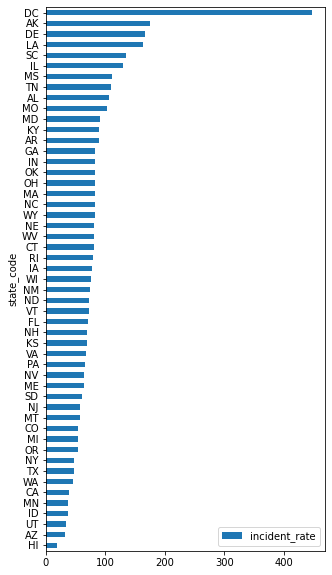

In [17]:
agg.sort_values('incident_rate').plot.barh(x='state_code',y='incident_rate',figsize=(5,10))


DC seems to be an outlier due to its limited space. Many more people go into DC to work than live there, which inflates per population rates. This effect can be seen in the per capita gdp of DC as well. Will remove DC data for mapping.  
Using plotly for choropleth



In [18]:


fig = go.Figure(data=go.Choropleth(
    locations=agg['state_code'], # Spatial coordinates
    z = agg['incident_rate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "# Incidents",
))

fig.update_layout(
    title_text = 'Total Gun Violence Incidents 2014-2017 by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


In [19]:
#Exclude DC due to not being plotted and throwing off y axis
agg=agg[agg.state_code!='DC']

fig = go.Figure(data=go.Choropleth(
    locations=agg['state_code'], # Spatial coordinates
    z = agg['incident_rate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "# Incidents per 100,000 People",
))

fig.update_layout(
    title_text = 'Total Gun Violence Incidents 2014-2017 by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

Gonna do one of these with total incidents and compare

In [20]:
df=mdf
df.groupby('participant_gender').count()

#contains list of participant genders, need to aggregate


,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,dotw,year,m/d,state_code
participant_gender,,,,,,,,,,,,,,,,,,,,,
0::Female,7312,7312,7312,7312,6719,7312,7312,7312,7300,7312,...,142,7285,7312,7303,6324,6507,7312,7312,7312,7312
0::Female||1::Female,875,875,875,875,819,875,875,875,874,875,...,133,871,875,875,768,790,875,875,875,875
0::Female||1::Female||2::Female,99,99,99,99,93,99,99,99,99,99,...,13,99,99,99,82,88,99,99,99,99
0::Female||1::Female||2::Female||3::Female,12,12,12,12,11,12,12,12,12,12,...,0,12,12,12,8,8,12,12,12,12
0::Female||1::Female||2::Female||3::Female||4::Female,3,3,3,3,2,3,3,3,3,3,...,2,3,3,3,2,2,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7::Male||8::Male||9::Male||10::Male||11::Male,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,0,0,1,1,1,1
8::Female||13::Male||15::Female,1,1,1,1,0,1,1,1,1,1,...,0,1,1,1,0,0,1,1,1,1
8::Male,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



([<matplotlib.patches.Wedge at 0x7f56f4eac150>,
 [Text(-1.019817466479084, 0.41227701253427024, 'Male'),
  Text(1.0198174761291234, -0.4122769886637199, 'Female')])

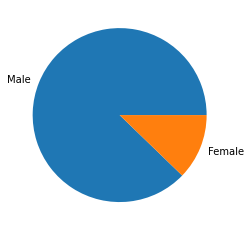

In [21]:
df=df.dropna(subset=['participant_gender'])
#need to drop nans for apply to work
def count_male(string):
    t=string.count('Male')
    return t

def count_female(string):
    t=string.count('Female')
    return t


df['male_participants']=df['participant_gender'].apply(count_male)
df['female_participants']=df['participant_gender'].apply(count_female)
#I think this is throwing the error because its a string function, 
#but I'll just suppress those in the final version since nothing too funky is actually happening and it seems to work fine
num_female=df['female_participants'].sum()
num_male=df['male_participants'].sum()
plt.pie([num_male,num_female],labels=['Male','Female'])

Massive difference, research why?

In [22]:
df=mdf
df.groupby('participant_age').count()
#super weird inconsistent formatting

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,dotw,year,m/d,state_code
participant_age,,,,,,,,,,,,,,,,,,,,,
0:1,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
0:10,2,2,2,2,1,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2
0:11,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
0:11|1:12,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
0:11|1:15,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8::18,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
8::22,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
8::27,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


I think I'll stick to mostly time trends, as I would have to do a good amount of annoying stripping to get usable data just for a single histogram most likely saying that younger people are more likely to participate in gun violence.

In [23]:
!jupyter nbconvert --to html Messy-GunViolenceStats.ipynb

[NbConvertApp] Converting notebook Messy-GunViolenceStats.ipynb to html
[NbConvertApp] Writing 851451 bytes to Messy-GunViolenceStats.html


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8fad058d-ad55-449d-a4e6-d77086f48415' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>